In [1]:
# Import packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Point
from shapely.geometry import shape
import seaborn as sns
from datetime import datetime
import os
from zipfile import ZipFile
import random
import networkx as nx
from datetime import datetime, timedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
fl_city_boundary = gpd.read_file('Map/fl_city_boundary.shp')
Gainesville_boundary = fl_city_boundary.loc[fl_city_boundary['NAME'] == 'GAINESVILLE'].reset_index(drop=True)
Gainesville_boundary['geometry'] = Gainesville_boundary['geometry'].to_crs('epsg:4326')

grid_centroid_gdf = pd.read_csv('grid_centroid_gdf.csv')
grid_centroid_gdf = grid_centroid_gdf.drop(columns = {'geometry', 'centroid'}, axis = 1)
grid_centroid_gdf['geometry'] = grid_centroid_gdf[['longitude', 'latitude']].values.tolist()
grid_centroid_gdf['geometry'] = grid_centroid_gdf['geometry'].apply(Point)

grid_centroid_gdf_old = pd.read_csv('grid_centroid_gdf_old.csv')
grid_centroid_gdf_old = grid_centroid_gdf_old.drop(columns = {'geometry', 'centroid'}, axis = 1)
grid_centroid_gdf_old['geometry'] = grid_centroid_gdf_old[['longitude', 'latitude']].values.tolist()
grid_centroid_gdf_old['geometry'] = grid_centroid_gdf_old['geometry'].apply(Point)

print('departure_rate:', np.sum(grid_centroid_gdf['departure_rate'] == grid_centroid_gdf_old['departure_rate']))
print('arrival_rate:', np.sum(grid_centroid_gdf['arrival_rate'] == grid_centroid_gdf_old['arrival_rate']))
print('geometry:', np.sum(grid_centroid_gdf['geometry'] == grid_centroid_gdf_old['geometry']))

grid_centroid_gdf = grid_centroid_gdf.loc[grid_centroid_gdf['departure_rate'] > 0].reset_index()
grid_centroid_gdf_old = grid_centroid_gdf_old.loc[grid_centroid_gdf_old['departure_rate'] > 0].reset_index()

print('departure_rate:', np.sum(grid_centroid_gdf['departure_rate'] == grid_centroid_gdf_old['departure_rate']))
print('arrival_rate:', np.sum(grid_centroid_gdf['arrival_rate'] == grid_centroid_gdf_old['arrival_rate']))
print('geometry:', np.sum(grid_centroid_gdf['geometry'] == grid_centroid_gdf_old['geometry']))

grid_centroid_gdf.head()

departure_rate: 4404
arrival_rate: 4404
geometry: 4404
departure_rate: 1388
arrival_rate: 1388
geometry: 1388


,index,latitude,longitude,departure_rate,arrival_rate,dist_transPOI,num_transPOI,dist_bus_stop,num_bus_stop,geometry
0,29,29.658570,-82.415016,0.022484,0.038544,0.081538,1.0,0.030854,1.0,POINT (-82.41501609853275 29.65857013179353)
1,30,29.660371,-82.414990,0.002141,0.005353,1.000000,0.0,1.000000,0.0,POINT (-82.4149895039865 29.660371378494247)
2,47,29.654944,-82.413000,0.001071,0.002141,1.000000,0.0,1.000000,0.0,POINT (-82.41300040184892 29.654944475167262)
3,48,29.656746,-82.412974,0.004283,0.008565,1.000000,0.0,1.000000,0.0,POINT (-82.41297377438231 29.65674571873145)
4,49,29.658547,-82.412947,0.078158,0.100642,1.000000,0.0,1.000000,0.0,POINT (-82.41294714602218 29.6585469636598)


### Grid-Based Analysis

Text(0, 0.5, 'Grid counts')

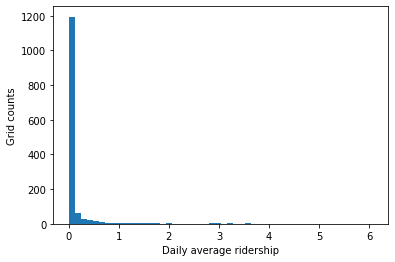

In [3]:
l1 = plt.hist(grid_centroid_gdf['departure_rate'], bins = 50)
plt.xlabel('Daily average ridership')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

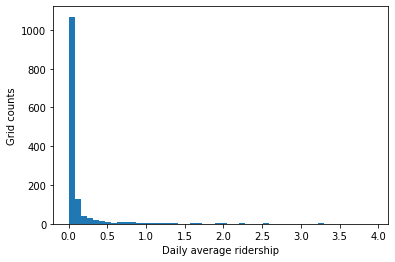

In [4]:
l1 = plt.hist(grid_centroid_gdf['arrival_rate'], bins = 50)
plt.xlabel('Daily average ridership')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

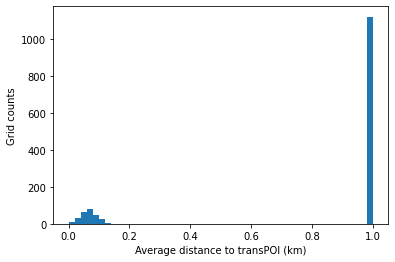

In [5]:
l1 = plt.hist(grid_centroid_gdf['dist_transPOI'], bins = 50)
plt.xlabel('Average distance to transPOI (km)')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

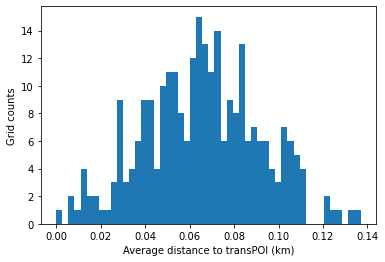

In [6]:
l1 = plt.hist(grid_centroid_gdf['dist_transPOI'].loc[grid_centroid_gdf['dist_transPOI'] < 1], bins = 50)
# l1 = plt.hist(grid_centroid_gdf['dist_transPOI'], bins = 10)
plt.xlabel('Average distance to transPOI (km)')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

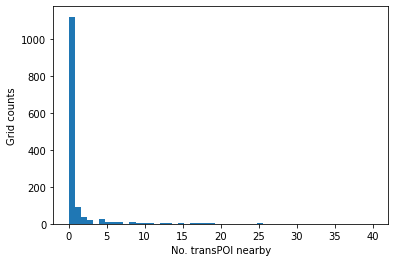

In [13]:
l1 = plt.hist(grid_centroid_gdf['num_transPOI'], bins = 50)
plt.xlabel('No. transPOI nearby')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

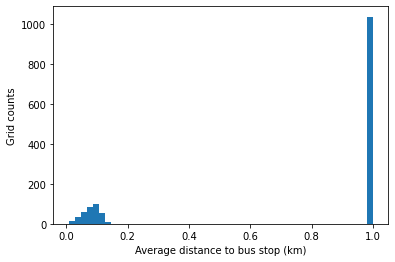

In [9]:
# l1 = plt.hist(grid_centroid_gdf['dist_transPOI'].loc[grid_centroid_gdf['dist_transPOI'] < 1], bins = 50)
l1 = plt.hist(grid_centroid_gdf['dist_bus_stop'], bins = 50)
plt.xlabel('Average distance to bus stop (km)')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

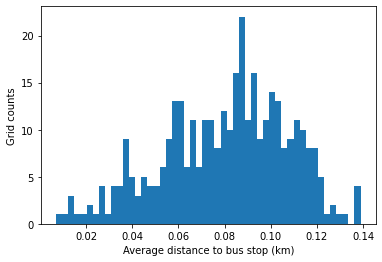

In [10]:
# l1 = plt.hist(grid_centroid_gdf['dist_transPOI'].loc[grid_centroid_gdf['dist_transPOI'] < 1], bins = 50)
l1 = plt.hist(grid_centroid_gdf['dist_bus_stop'].loc[grid_centroid_gdf['dist_bus_stop'] < 1], bins = 50)
plt.xlabel('Average distance to bus stop (km)')
plt.ylabel('Grid counts')

Text(0, 0.5, 'Grid counts')

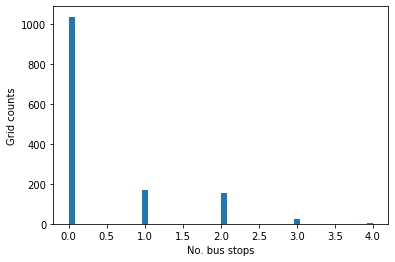

In [14]:
l1 = plt.hist(grid_centroid_gdf['num_bus_stop'], bins = 50)
plt.xlabel('No. bus stops')
plt.ylabel('Grid counts')

### Base Scenario

In [7]:
base_scenario = pd.read_csv('base_scenario_v11.csv')

In [8]:
docked_cost = 500
scooter_cost = 250
print('reward_function_value:', -94.714)
print('total number of docked sites:', 139)
print('total number of scooters:', 283)
print('capital cost:', 283*(docked_cost + scooter_cost))

reward_function_value: -94.714
total number of docked sites: 139
total number of scooters: 283
capital cost: 212250


#### Grid-Level Evaluation

In [9]:
def gini(array):
    array = np.array(array, dtype=np.float64)
    if np.amin(array) < 0:
        raise ValueError("Values cannot be negative")

    array += 1e-10  # Prevent division by zero
    array = np.sort(array)
    n = array.size
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

In [10]:
demand_total_arr = []
usage_efficiency_arr = []
met_demand_total_arr = []
unmet_demand_total_arr = []
equity_arr = []
for ii in range(100):
    demand_total = 0 # replace stations
    usage_efficiency = []
    met_demand = []
    unmet_demand = []
    for i in range (len(grid_centroid_gdf)):
        grid_level_demand = max(0, np.random.poisson(grid_centroid_gdf.departure_rate.iloc[i] * 1))
        if base_scenario['scooter_num_per_grid'].iloc[i] > 0:
            usage_efficiency.append(grid_level_demand / base_scenario['scooter_num_per_grid'].iloc[i])
        met_demand.append(min(grid_level_demand, base_scenario['scooter_num_per_grid'].iloc[i]))
        unmet_demand.append(max(0, grid_level_demand - base_scenario['scooter_num_per_grid'].iloc[i]))
        demand_total += grid_level_demand
    usage_efficiency_arr.append(np.mean(np.array(usage_efficiency)))
    met_demand_total_arr.append(np.sum(np.array(met_demand)))
    unmet_demand_total_arr.append(np.sum(np.array(unmet_demand)))
    demand_total_arr.append(demand_total)
    equity_arr.append(gini(np.array(unmet_demand)))
demand_total_arr = np.array(demand_total_arr)
usage_efficiency_arr = np.array(usage_efficiency_arr)
met_demand_total_arr = np.array(met_demand_total_arr)
unmet_demand_total_arr = np.array(unmet_demand_total_arr)
equity_arr = np.array(equity_arr)
print("daily demand in total:", int(np.mean(demand_total_arr)))
print("average usage efficency:", np.mean(usage_efficiency_arr))
print("met demand in total:", np.mean(met_demand_total_arr))
print("unmet_demand in total:", np.mean(unmet_demand_total_arr))
print("equity metrics:", np.mean(equity_arr))

daily demand in total: 181
average usage efficency: 0.40694630010277494
met demand in total: 99.06
unmet_demand in total: 82.25
equity metrics: 0.9611568880509026


### Reducing Equity

In [7]:
equity_scenario = pd.read_csv('equity_scenario_v11.csv')

In [8]:
docked_cost = 500
scooter_cost = 250
print('reward_function_value:', -38.575)
print('total number of docked sites:', 126)
print('total number of scooters:', 262)
print('capital cost:', 262*(docked_cost + scooter_cost))

reward_function_value: -38.575
total number of docked sites: 126
total number of scooters: 262
capital cost: 196500


#### Grid-Level Evaluation

In [9]:
def gini(array):
    array = np.array(array, dtype=np.float64)
    if np.amin(array) < 0:
        raise ValueError("Values cannot be negative")

    array += 1e-10  # Prevent division by zero
    array = np.sort(array)
    n = array.size
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

In [10]:
demand_total_arr = []
usage_efficiency_arr = []
met_demand_total_arr = []
unmet_demand_total_arr = []
equity_arr = []
for ii in range(100):
    demand_total = 0 # replace stations
    usage_efficiency = []
    met_demand = []
    unmet_demand = []
    for i in range (len(grid_centroid_gdf)):
        grid_level_demand = max(0, np.random.poisson(grid_centroid_gdf.departure_rate.iloc[i] * 1))
        if equity_scenario['scooter_num_per_grid'].iloc[i] > 0:
            usage_efficiency.append(grid_level_demand / equity_scenario['scooter_num_per_grid'].iloc[i])
        met_demand.append(min(grid_level_demand, equity_scenario['scooter_num_per_grid'].iloc[i]))
        unmet_demand.append(max(0, grid_level_demand - equity_scenario['scooter_num_per_grid'].iloc[i]))
        demand_total += grid_level_demand
    usage_efficiency_arr.append(np.mean(np.array(usage_efficiency)))
    met_demand_total_arr.append(np.sum(np.array(met_demand)))
    unmet_demand_total_arr.append(np.sum(np.array(unmet_demand)))
    demand_total_arr.append(demand_total)
    equity_arr.append(gini(np.array(unmet_demand)))
demand_total_arr = np.array(demand_total_arr)
usage_efficiency_arr = np.array(usage_efficiency_arr)
met_demand_total_arr = np.array(met_demand_total_arr)
unmet_demand_total_arr = np.array(unmet_demand_total_arr)
equity_arr = np.array(equity_arr)
print("daily demand in total:", int(np.mean(demand_total_arr)))
print("average usage efficency:", np.mean(usage_efficiency_arr))
print("met demand in total:", np.mean(met_demand_total_arr))
print("unmet_demand in total:", np.mean(unmet_demand_total_arr))
print("equity metrics:", np.mean(equity_arr))

daily demand in total: 181
average usage efficency: 0.4714960317460319
met demand in total: 98.37
unmet_demand in total: 83.26
equity metrics: 0.961113208435161


### Adding Multimodal Integration

In [11]:
MMI_scenario = pd.read_csv('MMI_scenario_v12.csv')

In [12]:
docked_cost = 500
scooter_cost = 250
print('reward_function_value:', -162.075)
print('total number of docked sites:', 128)
print('total number of scooters:', 284)
print('capital cost:', 284*(docked_cost + scooter_cost))

reward_function_value: -162.075
total number of docked sites: 128
total number of scooters: 284
capital cost: 213000


#### Grid-Level Evaluation

In [13]:
def gini(array):
    array = np.array(array, dtype=np.float64)
    if np.amin(array) < 0:
        raise ValueError("Values cannot be negative")

    array += 1e-10  # Prevent division by zero
    array = np.sort(array)
    n = array.size
    index = np.arange(1, n + 1)
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

In [14]:
demand_total_arr = []
usage_efficiency_arr = []
met_demand_total_arr = []
unmet_demand_total_arr = []
equity_arr = []
for ii in range(100):
    demand_total = 0 # replace stations
    usage_efficiency = []
    met_demand = []
    unmet_demand = []
    for i in range (len(grid_centroid_gdf)):
        grid_level_demand = max(0, np.random.poisson(grid_centroid_gdf.departure_rate.iloc[i] * 1))
        if MMI_scenario['scooter_num_per_grid'].iloc[i] > 0:
            usage_efficiency.append(grid_level_demand / MMI_scenario['scooter_num_per_grid'].iloc[i])
        met_demand.append(min(grid_level_demand, MMI_scenario['scooter_num_per_grid'].iloc[i]))
        unmet_demand.append(max(0, grid_level_demand - MMI_scenario['scooter_num_per_grid'].iloc[i]))
        demand_total += grid_level_demand
    usage_efficiency_arr.append(np.mean(np.array(usage_efficiency)))
    met_demand_total_arr.append(np.sum(np.array(met_demand)))
    unmet_demand_total_arr.append(np.sum(np.array(unmet_demand)))
    demand_total_arr.append(demand_total)
    equity_arr.append(gini(np.array(unmet_demand)))
demand_total_arr = np.array(demand_total_arr)
usage_efficiency_arr = np.array(usage_efficiency_arr)
met_demand_total_arr = np.array(met_demand_total_arr)
unmet_demand_total_arr = np.array(unmet_demand_total_arr)
equity_arr = np.array(equity_arr)
print("daily demand in total:", int(np.mean(demand_total_arr)))
print("average usage efficency:", np.mean(usage_efficiency_arr))
print("met demand in total:", np.mean(met_demand_total_arr))
print("unmet_demand in total:", np.mean(unmet_demand_total_arr))
print("equity metrics:", np.mean(equity_arr))

daily demand in total: 178
average usage efficency: 0.3964364769345238
met demand in total: 94.08
unmet_demand in total: 84.08
equity metrics: 0.96064531550646
